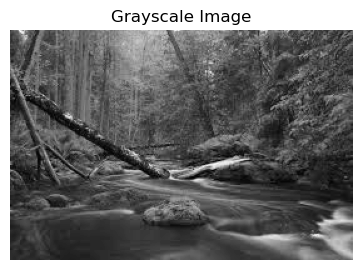

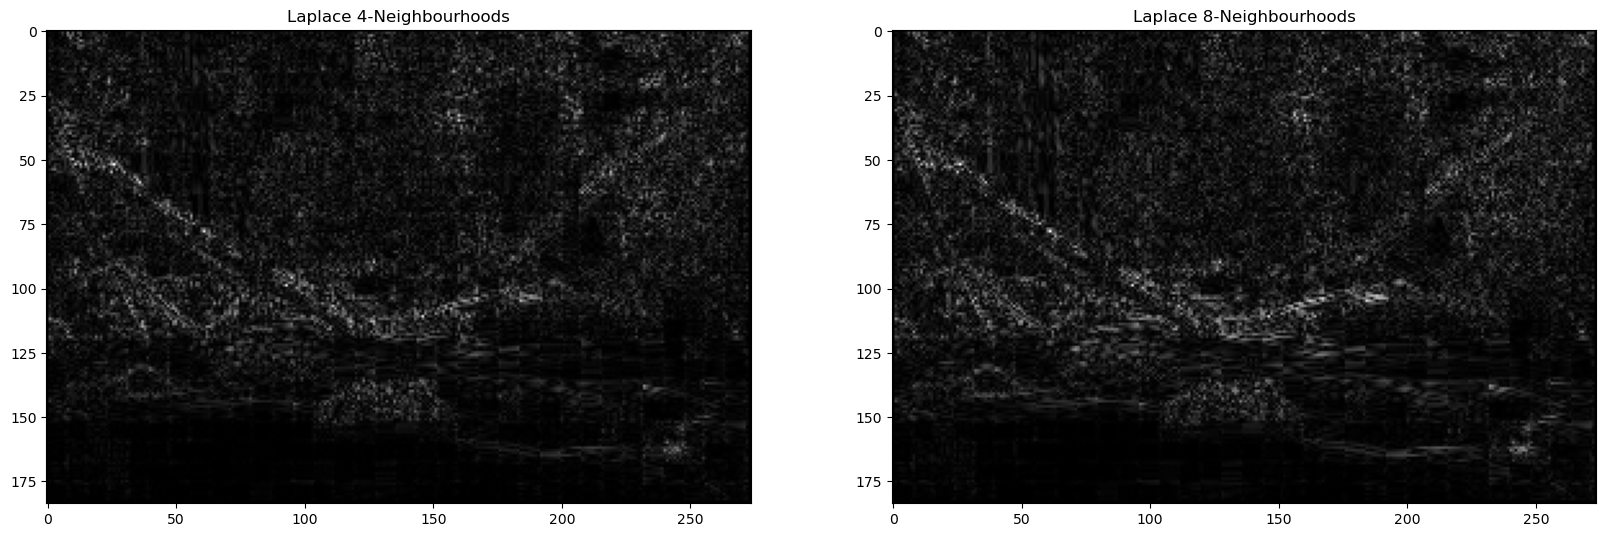

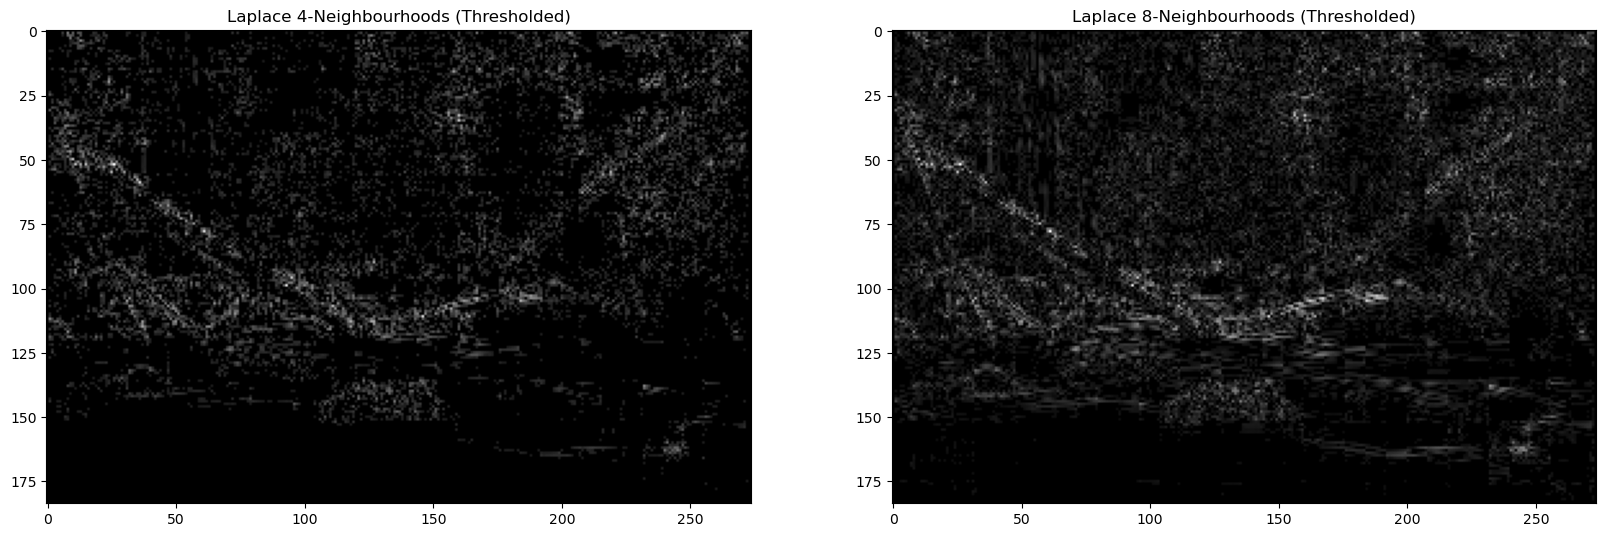

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Image path
image_path = r"C:\Users\Student\Desktop\images\download (1).jpg"

# Function to plot image
def plotimage(img, title=None, figsize=None):
    h, w = img.shape[:2]
    dpi = 80
    if figsize is None:
        figsize = w / float(dpi), h / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.show()

# Load and convert the image to grayscale
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display grayscale image
plotimage(gray, 'Grayscale Image')

# Operator class definition
class Operator:
    def __init__(self, kernel, center=None):
        if type(kernel) is not np.ndarray:
            kernel = np.asarray(kernel)
        if len(kernel.shape) != 2:
            raise Exception("Operator should be a 2D array")
        self.kernel = kernel
        if center is None:
            center = ((kernel.shape[0]-1)//2, (kernel.shape[1]-1)//2)
        self.center = center

    def __repr__(self):
        return f"kernel: {self.kernel} | center: {self.center}".replace("\n", " ")

    def width(self):
        return self.kernel.shape[0]

    def height(self):
        return self.kernel.shape[1]

    def center_to_bottom_right(self):
        return self.center_to_right(), self.center_to_bottom()

    def center_to_right(self):
        return self.width() - 1 - self.center[0]

    def center_to_bottom(self):
        return self.height() - 1 - self.center[1]

    def apply_operator(self, gray):
        """
        Convolution of the operator through the image
        """
        imwidth, imheight = gray.shape
        result = np.zeros_like(gray, dtype='int')
        for i in range(self.center[0], imwidth-self.center_to_right()):
            for j in range(self.center[1], imheight-self.center_to_bottom()):
                region = gray[i-self.center[0]:i+self.center_to_right()+1, j-self.center[1]:j+self.center_to_bottom()+1]
                result[i, j] = np.sum(self.kernel * region)
        return result

# Laplace operators for 4-neighborhood and 8-neighborhood connectivity
laplace4 = Operator([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

laplace8 = Operator(np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]
]))

# Apply operators and take the absolute value
res4 = np.abs(laplace4.apply_operator(gray))
res8 = np.abs(laplace8.apply_operator(gray))

# Plot results
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.title("Laplace 4-Neighbourhoods"), plt.imshow(res4, cmap='gray')
plt.subplot(122), plt.title("Laplace 8-Neighbourhoods"), plt.imshow(res8, cmap='gray')
plt.show()

# Apply thresholding
thresh = 50
res4[res4 < thresh] = 0
res8[res8 < thresh] = 0

# Plot thresholded results
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.title("Laplace 4-Neighbourhoods (Thresholded)"), plt.imshow(res4, cmap='gray')
plt.subplot(122), plt.title("Laplace 8-Neighbourhoods (Thresholded)"), plt.imshow(res8, cmap='gray')
plt.show()
